In [1]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Figurative Scenario*

### **Identify and Explain Issue**

In [2]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "decision":"Speaker # or both or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'His words cut like a knife.',
  'Speaker 2': 'Is anyone bleeding?'},
 {'Speaker 1': "He's in hot water after the mistake he made.",
  'Speaker 2': 'Isn’t that dangerous?'}]

In [4]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))

In [5]:
with open('../figurative_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)

In [6]:
with open('../figurative_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]

[{'decision': 'neither',
  'explanation': "Speaker 1 used a metaphor to describe the impact of someone's words, while Speaker 2 took the statement literally, which may be aligned with the communication style of an autistic individual who might prioritize literal and direct interpretation. Both speakers are effectively communicating in their own styles. Speaker 1 expresses emotion through figurative language, and Speaker 2 seeks clarity by addressing potential literal harm. Understanding and accommodating different communication styles is key, so neither needs to improve their communication inherently; rather, mutual recognition and adaptation to each other's styles would foster better understanding."},
 {'decision': 'neither',
  'explanation': "Speaker 1 uses an idiom 'in hot water,' which implies someone is in trouble due to a mistake. Speaker 2's question shows a literal interpretation of the idiom, which is common in autistic individuals who may take language at face value. In this 

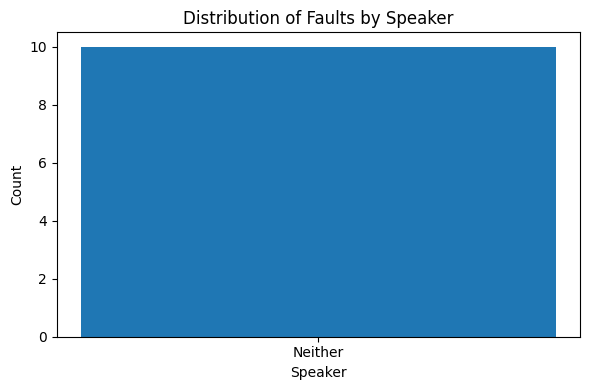

In [7]:
normalized_faults = []
for r in results_loaded:
    fault = r['decision'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [2]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [4]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))

In [5]:
with open('../figurative_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)

In [6]:
with open('../figurative_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]

[{'feedback': "Speaker 2, your response may come across as dismissive or sarcastic, which can exacerbate the frustration of Speaker 1. It's important to acknowledge Speaker 1's feelings directly. A more supportive response could be, 'I can see you're frustrated with the delays. Is there anything specific that's causing the hold-up that we can address?'"},
 {'feedback': 'Speaker 1, your statement uses an idiom that might be confusing. Rephrasing it to something more specific could improve clarity. Speaker 2, asking for clarification is a good practice and helps in understanding the context better. Both should aim for clear, direct communication to ensure mutual understanding.'},
 {'feedback': "The exchange demonstrates clear communication, but to improve it, Speaker 2 might benefit from understanding the idiom Speaker 1 used. Speaker 1's phrase, 'too many irons in the fire,' means taking on too many activities or responsibilities. Speaker 2's response, although creative, misses the idio